# OSM - geometry and graph
Before we get started, we need to import the necessary libraries.

In [1]:
import osmnx as ox
from IPython.display import Image

%matplotlib inline
ox.config(log_console=True)
ox.__version__

'1.1.1'

## Plot Aachen street network type
OpenStreetMap's data are useful to study urban form, networks, resilience, and accessibility. [Street network](https://geoffboeing.com/2017/04/urban-form-analysis-openstreetmap/) data especially when holding these cities at the same scale providing spatial objectivity in comparing urban forms. Comparing the following city networks (all cities a part of the rheinisch mining area) show essential differences and outline their uniqueness. ![Street_Network](./img/streetNetwork.png)  

For the first plot we need to define the dpi, the size (make sure it is not too big, or it may take some time to be plotted) and of course a place. These are essential inputs for the plot_figure_ground method. But the map is not just visualized as the output here, but also saved as **aachen.png**. If parameters are unclear or unknown, have a look at the documentation, every parameter is described there.

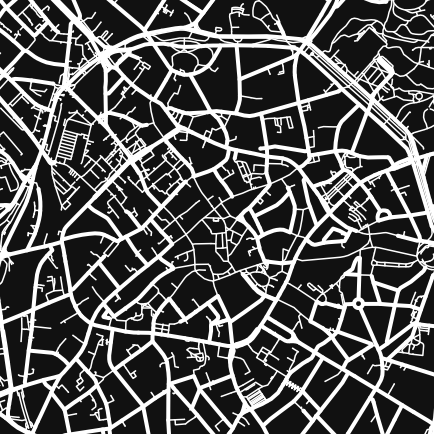

In [2]:
#Setting values for parameters
dpi=72
size=600
place = "Aachen, Germany"
fp = f"./aachen.png"
#Querying OSM data using a city name
fig, ax = ox.plot_figure_ground(
    address=place,
    network_type="walk",
    filepath=fp,
    dpi=dpi,
    save=True,
    show=False,
    close=True,
)
Image(fp, height=size, width=size)

## Let us create a figure ground plan
Next step, creating a figure ground plan of Aachen. Therefore, we first have to set a centre point, a distance, and a tag. The function creates a GeoDataFrame of OSM with a distance to N, S, W, E. The short form gdf stands for GeoDataFrame.

In [3]:
#Defining required tags for quering OSM
tags={"building":True}
point = (50.775593, 6.082478)
size=500
dist = 1000
#OSMnx method geometries_from_point queryies OSM data using a point
gdf = ox.geometries_from_point(point, tags, dist=dist)
gdf_proj = ox.project_gdf(gdf)

In [4]:
gdf.head()

addr:city addr:housenumber     addr:street  \
element_type osmid                                                   
node         3197800212       NaN              NaN             NaN   
             4962495741       NaN              NaN             NaN   
             6712788490    Aachen               20  Harscampstraße   
way          8068434       Aachen            38-40           Markt   
             8600644       Aachen               44   Monheimsallee   

                                                                  geometry  \
element_type osmid                                                           
node         3197800212                           POINT (6.07873 50.77810)   
             4962495741                           POINT (6.08596 50.78262)   
             6712788490                           POINT (6.09081 50.77384)   
way          8068434     POLYGON ((6.08422 50.77600, 6.08410 50.77600, ...   
             8600644     POLYGON ((6.09271 50.78156, 6.09274 50.78158, ...   

                                  amenity  \
element_type osmid                          
node         3197800212               NaN   
             4962495741               NaN   
             6712788490  place_of_worship   
way          8068434             townhall   
             8600644                  NaN   

                                                               description  \
element_type osmid                                                           
node         3197800212  Lernraum im SuperC mit 268 Arbeitsplätzen. Zug...   
             4962495741                                                NaN   
             6712788490                                                NaN   
way          8068434                                                   NaN   
             8600644                                                   NaN   

                        check_date      opening_hours operator wheelchair  \
element_type osmid                                                          
node         3197800212        NaN  Mo-Fr 09:00-22:00      NaN        yes   
             4962495741        NaN                NaN      NaN        NaN   
             6712788490        NaN                NaN      NaN        NaN   
way          8068434           NaN  Mo-Su 10:00-18:00      NaN        yes   
             8600644           NaN                NaN      NaN        NaN   

                         ... ramp:wheelchair roof:type:height  \
element_type osmid       ...                                    
node         3197800212  ...             NaN              NaN   
             4962495741  ...             NaN              NaN   
             6712788490  ...             NaN              NaN   
way          8068434     ...             NaN              NaN   
             8600644     ...             NaN              NaN   

                        contact:instagram fixme contact:twitter  \
element_type osmid                                                
node         3197800212               NaN   NaN             NaN   
             4962495741               NaN   NaN             NaN   
             6712788490               NaN   NaN             NaN   
way          8068434                  NaN   NaN             NaN   
             8600644                  NaN   NaN             NaN   

                        air_conditioning reservation ways type scout  
element_type osmid                                                    
node         3197800212              NaN         NaN  NaN  NaN   NaN  
             4962495741              NaN         NaN  NaN  NaN   NaN  
             6712788490              NaN         NaN  NaN  NaN   NaN  
way          8068434                 NaN         NaN  NaN  NaN   NaN  
             8600644                 NaN         NaN  NaN  NaN   NaN  

[5 rows x 257 columns]

The output shows, that in the column geometry polygons show up. The function plot_footprints takes these polygons to create the footprints of the buildings. The figure-ground diagrams are essential when representing the relationship between the build and unbuild space. The probably most known example is the **Nolli Map** of Rome.

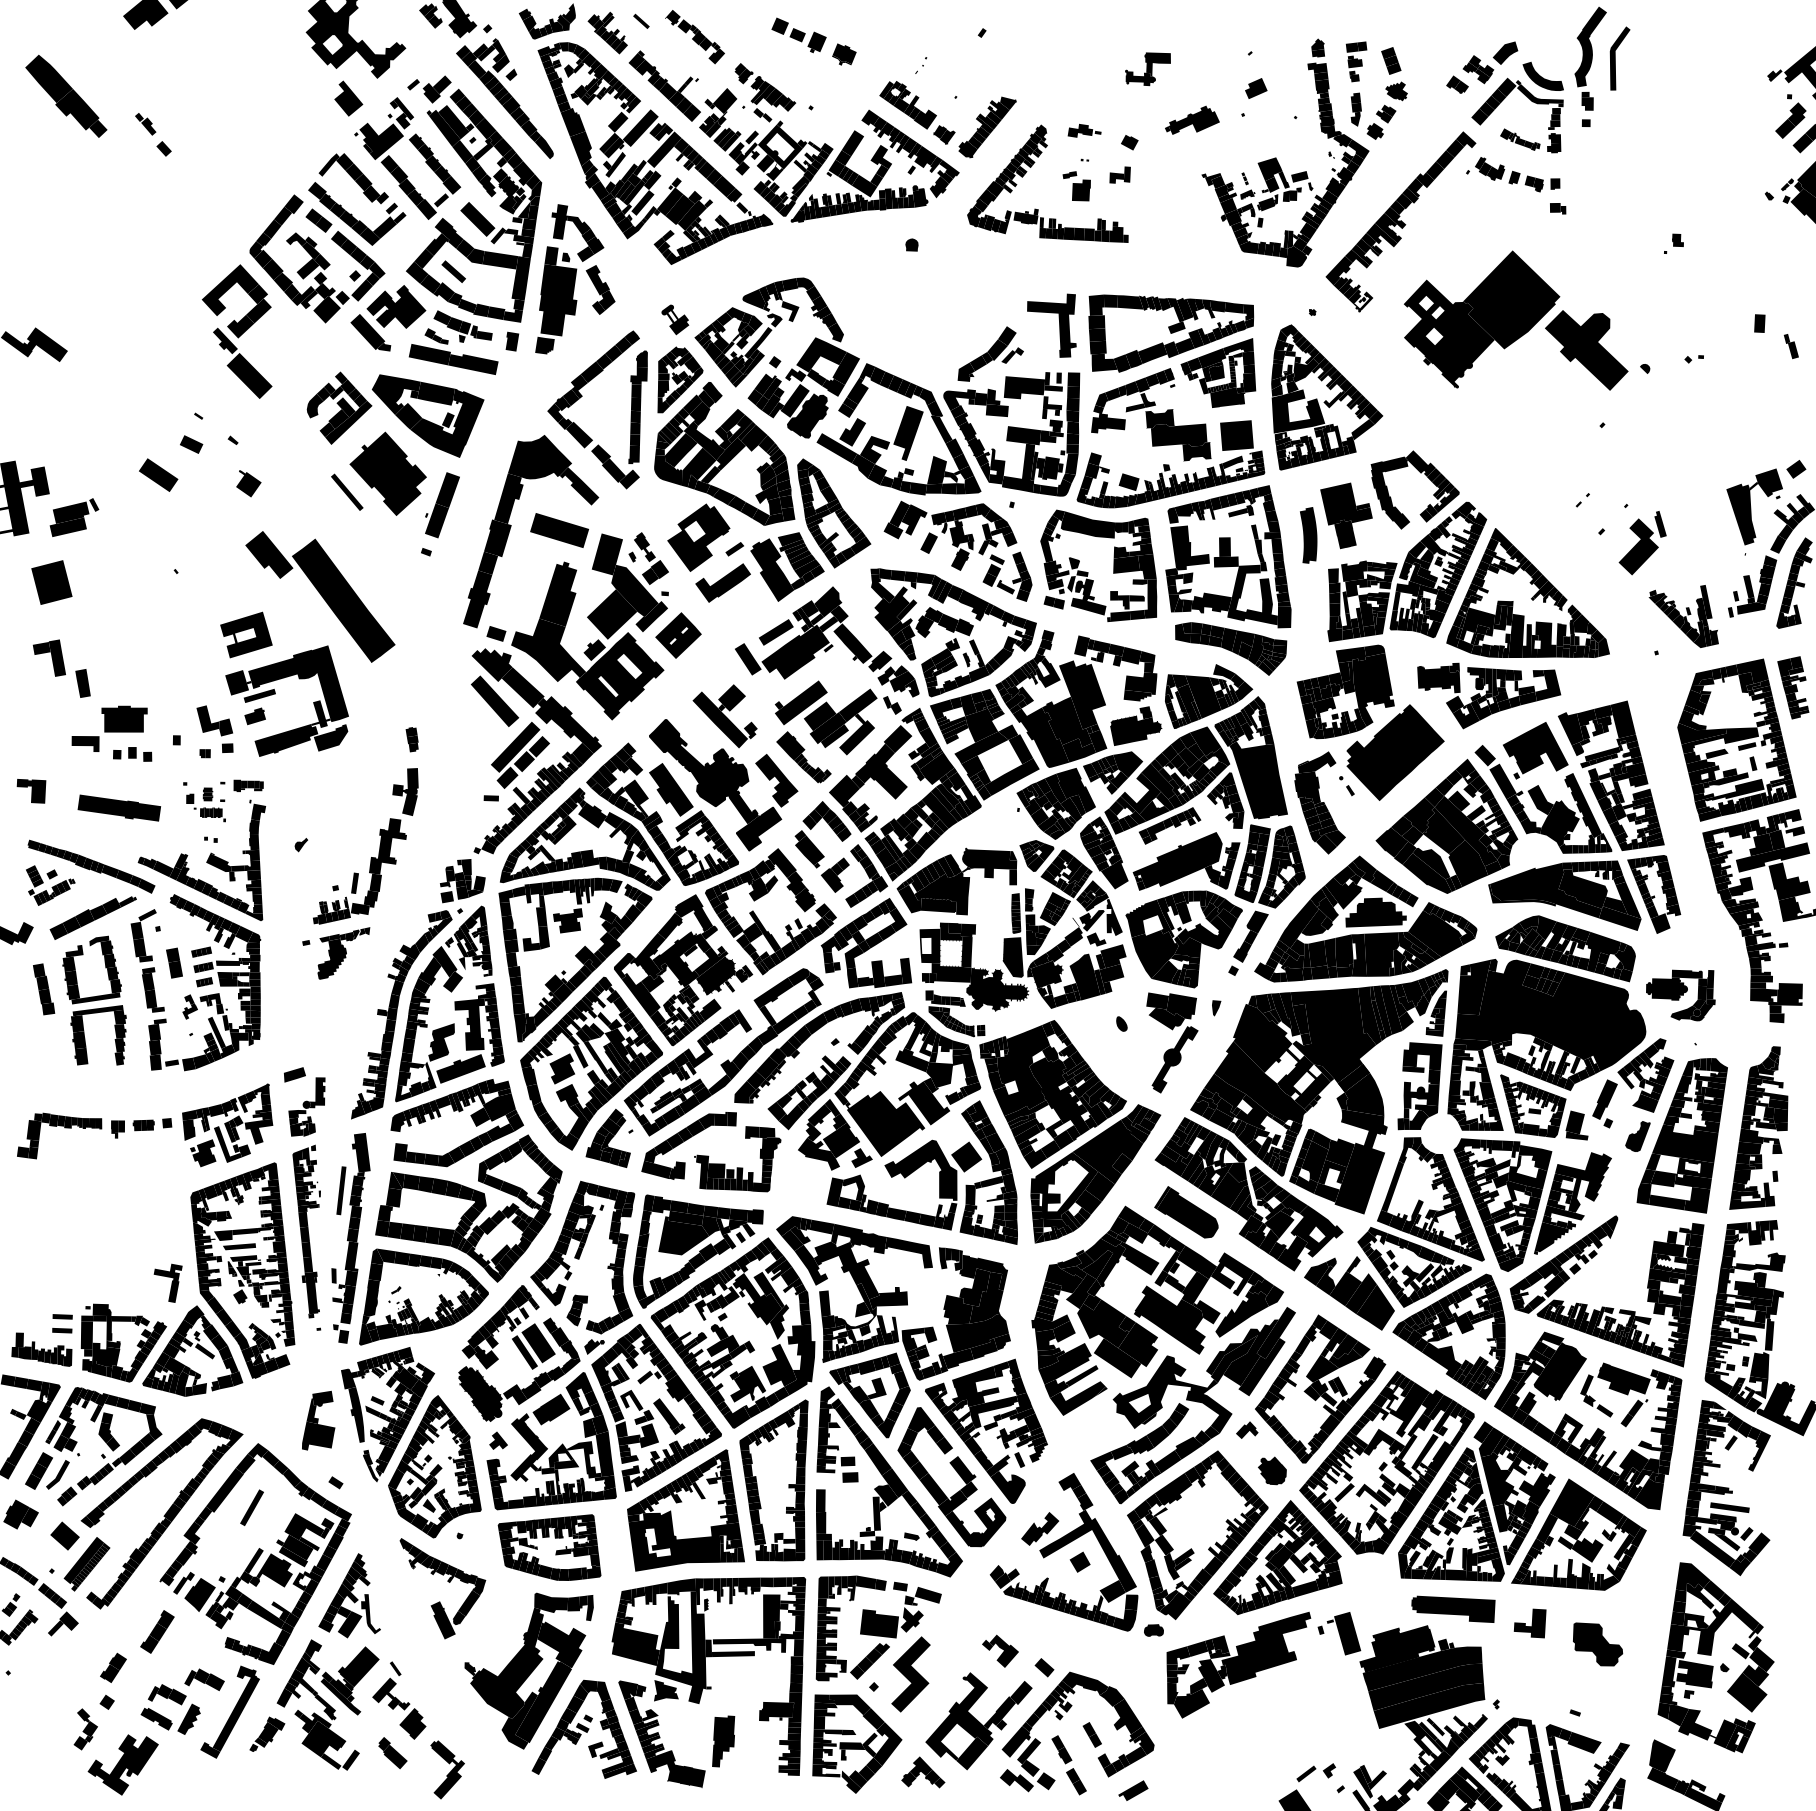

In [5]:
#Quering OSM by using the defined point
bbox = ox.utils_geo.bbox_from_point(point=point, dist=dist, project_utm=True)
fp = f"./aachen_schwarzplan.png"
#Generating figure ground plan 
fig, ax = ox.plot_footprints(
    gdf_proj,
    bbox=bbox,
    bgcolor="white",
    color="black",
    filepath=fp,
    dpi=300,
    save=True,
    show=False,
    close=True,
)
Image(fp, height=size, width=size)

### Exercise
Create a figure ground plan for your hometown or a city by choice, choose a suitable size.

## Analysing information 
Next, we analyse our information by slicing the GeoDataFrame. We take out specific information of *amenity* and *building*. We also get the geolocation (coordinates) of two specific buildings in Aachen *Reiff museum* and *Aachen central station*.

In [6]:
gdf.head()

addr:city addr:housenumber     addr:street  \
element_type osmid                                                   
node         3197800212       NaN              NaN             NaN   
             4962495741       NaN              NaN             NaN   
             6712788490    Aachen               20  Harscampstraße   
way          8068434       Aachen            38-40           Markt   
             8600644       Aachen               44   Monheimsallee   

                                                                  geometry  \
element_type osmid                                                           
node         3197800212                           POINT (6.07873 50.77810)   
             4962495741                           POINT (6.08596 50.78262)   
             6712788490                           POINT (6.09081 50.77384)   
way          8068434     POLYGON ((6.08422 50.77600, 6.08410 50.77600, ...   
             8600644     POLYGON ((6.09271 50.78156, 6.09274 50.78158, ...   

                                  amenity  \
element_type osmid                          
node         3197800212               NaN   
             4962495741               NaN   
             6712788490  place_of_worship   
way          8068434             townhall   
             8600644                  NaN   

                                                               description  \
element_type osmid                                                           
node         3197800212  Lernraum im SuperC mit 268 Arbeitsplätzen. Zug...   
             4962495741                                                NaN   
             6712788490                                                NaN   
way          8068434                                                   NaN   
             8600644                                                   NaN   

                        check_date      opening_hours operator wheelchair  \
element_type osmid                                                          
node         3197800212        NaN  Mo-Fr 09:00-22:00      NaN        yes   
             4962495741        NaN                NaN      NaN        NaN   
             6712788490        NaN                NaN      NaN        NaN   
way          8068434           NaN  Mo-Su 10:00-18:00      NaN        yes   
             8600644           NaN                NaN      NaN        NaN   

                         ... ramp:wheelchair roof:type:height  \
element_type osmid       ...                                    
node         3197800212  ...             NaN              NaN   
             4962495741  ...             NaN              NaN   
             6712788490  ...             NaN              NaN   
way          8068434     ...             NaN              NaN   
             8600644     ...             NaN              NaN   

                        contact:instagram fixme contact:twitter  \
element_type osmid                                                
node         3197800212               NaN   NaN             NaN   
             4962495741               NaN   NaN             NaN   
             6712788490               NaN   NaN             NaN   
way          8068434                  NaN   NaN             NaN   
             8600644                  NaN   NaN             NaN   

                        air_conditioning reservation ways type scout  
element_type osmid                                                    
node         3197800212              NaN         NaN  NaN  NaN   NaN  
             4962495741              NaN         NaN  NaN  NaN   NaN  
             6712788490              NaN         NaN  NaN  NaN   NaN  
way          8068434                 NaN         NaN  NaN  NaN   NaN  
             8600644                 NaN         NaN  NaN  NaN   NaN  

[5 rows x 257 columns]

In [7]:
#Extracting and reducing data from the DataFrame by slicing
gdf['amenity'].unique()

array([nan, 'place_of_worship', 'townhall', 'conference_centre',
       'parking', 'bus_station', 'library', 'bank', 'restaurant',
       'social_facility', 'pub', 'pharmacy', 'fast_food', 'brothel',
       'cafe', 'bar', 'driving_school', 'community_centre', 'school',
       'hospital', 'police', 'doctors', 'kindergarten', 'ice_cream',
       'clinic', 'post_office', 'cinema', 'college', 'theatre', 'dentist',
       'fuel', 'arts_centre', 'toilets', 'shelter', 'hookah_lounge',
       'monastery'], dtype=object)

In [8]:
#Extracting all elements with amenity cafe
gdf[gdf ["amenity"] == "cafe"].head()

addr:city addr:housenumber   addr:street  \
element_type osmid                                               
way          77626329    Aachen               13   Peterstraße   
             77738927    Aachen                6  Rethelstraße   
             79140422    Aachen               11  Krämerstraße   
             79140918    Aachen            18-20        Büchel   
             79512347    Aachen               17   Pontdriesch   

                                                                geometry  \
element_type osmid                                                         
way          77626329  POLYGON ((6.08880 50.77596, 6.08881 50.77595, ...   
             77738927  POLYGON ((6.08500 50.77611, 6.08497 50.77608, ...   
             79140422  POLYGON ((6.08438 50.77557, 6.08450 50.77558, ...   
             79140918  POLYGON ((6.08543 50.77582, 6.08547 50.77580, ...   
             79512347  POLYGON ((6.08123 50.77960, 6.08126 50.77958, ...   

                      amenity description check_date  \
element_type osmid                                     
way          77626329    cafe         NaN        NaN   
             77738927    cafe         NaN        NaN   
             79140422    cafe         NaN        NaN   
             79140918    cafe         NaN        NaN   
             79512347    cafe         NaN        NaN   

                                                           opening_hours  \
element_type osmid                                                         
way          77626329                                                NaN   
             77738927  Mo-Fr 09:00-18:30; Sa 09:00-18:00; Su 10:30-18:00   
             79140422  Mo-Fr 09:00-18:30; Sa 08:30-18:30; Su,PH 10:00...   
             79140918  Mo-Fr 09:00-18:30; Sa 09:00-18:00; Su 10:00-18:00   
             79512347                  Mo-Fr 12:00-18:30; Sa 10:00-16:00   

                                 operator wheelchair  ... ramp:wheelchair  \
element_type osmid                                    ...                   
way          77626329                 NaN    limited  ...             NaN   
             77738927                 NaN    limited  ...             NaN   
             79140422                 NaN        NaN  ...             NaN   
             79140918                 NaN         no  ...             NaN   
             79512347  Maqii, Sicco Kopka    limited  ...             NaN   

                      roof:type:height contact:instagram fixme  \
element_type osmid                                               
way          77626329              NaN               NaN   NaN   
             77738927              NaN               NaN   NaN   
             79140422              NaN               NaN   NaN   
             79140918              NaN               NaN   NaN   
             79512347              NaN               NaN   NaN   

                      contact:twitter air_conditioning reservation ways type  \
element_type osmid                                                             
way          77626329             NaN              NaN         NaN  NaN  NaN   
             77738927             NaN              NaN         NaN  NaN  NaN   
             79140422             NaN              NaN         NaN  NaN  NaN   
             79140918             NaN              NaN         NaN  NaN  NaN   
             79512347             NaN              NaN         NaN  NaN  NaN   

                      scout  
element_type osmid           
way          77626329   NaN  
             77738927   NaN  
             79140422   NaN  
             79140918   NaN  
             79512347   NaN  

[5 rows x 257 columns]

In [9]:
#Extracting and reducing data from the DataFrame by slicing
gdf['building'].unique()

array(['university', 'bunker', 'yes', 'government', 'church', 'cathedral',
       'parking', 'sports_centre', 'detached', 'commercial', 'service',
       'public', 'office', 'chapel', 'hotel', 'apartments', 'school',
       'garages', 'industrial', 'house', 'garage', 'retail', 'kiosk',
       'civic', 'mosque', 'dormitory', 'kindergarten', 'synagogue',
       'residential', 'hospital', 'roof', 'carport', 'train_station',
       'monastery', 'college', 'hut', 'semidetached_house', 'terrace',
       'greenhouse', 'warehouse', 'construction', 'shed'], dtype=object)

<AxesSubplot:>

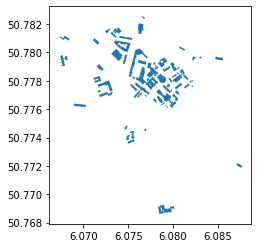

In [10]:
#Extracting all elements which are university buildings
gdf[gdf['building'] == "university"].plot()

In [11]:
#Quering the exact geopoint of the two places in Aachen
reiff = ox.geocode("reiff museum aachen")
hbf = ox.geocode("Aachen Hauptbahnhof")

In [12]:
#Get the geometry from buildings in a distance of 100 around the first place
rdf = ox.geometries_from_point(reiff, tags={"building":True},dist=100)
rdf.head()

amenity opening_hours operator wheelchair  \
element_type osmid                                                
way          27523976     NaN           NaN      NaN        yes   
             30440687     NaN           NaN      NaN        yes   
             30440688     NaN           NaN      NaN        NaN   
             30440696     NaN           NaN      NaN        NaN   
             32322791     NaN           NaN      NaN        yes   

                                                                geometry note  \
element_type osmid                                                              
way          27523976  POLYGON ((6.07585 50.77811, 6.07589 50.77819, ...  NaN   
             30440687  POLYGON ((6.07981 50.77636, 6.07950 50.77662, ...  NaN   
             30440688  POLYGON ((6.07839 50.77696, 6.07866 50.77674, ...  NaN   
             30440696  POLYGON ((6.07740 50.77812, 6.07717 50.77798, ...  NaN   
             32322791  POLYGON ((6.07777 50.77668, 6.07795 50.77678, ...  NaN   

                                                           name shop  \
element_type osmid                                                     
way          27523976  Institut für Hochspannungstechnik | IFHT  NaN   
             30440687   Ex-Kármán-Auditorium | z.Z. stillgelegt  NaN   
             30440688                   Philosophische Fakultät  NaN   
             30440696                                       NaN  NaN   
             32322791                               Couvenhalle  NaN   

                                                                   nodes  \
element_type osmid                                                         
way          27523976  [297117980, 829833012, 335937454, 297118029, 3...   
             30440687  [335937253, 335937256, 4360244095, 4360244096,...   
             30440688  [335937277, 1344437555, 335937280, 335937282, ...   
             30440696  [335937416, 335937445, 335937444, 335937442, 3...   
             32322791  [5435722941, 5435722945, 820866194, 363909687,...   

                      addr:city  ... wikipedia building:use height layer  \
element_type osmid               ...                                       
way          27523976    Aachen  ...       NaN          NaN    NaN   NaN   
             30440687    Aachen  ...       NaN          NaN    NaN   NaN   
             30440688    Aachen  ...       NaN          NaN    NaN   NaN   
             30440696       NaN  ...       NaN          NaN    NaN   NaN   
             32322791    Aachen  ...       NaN          NaN    NaN   NaN   

                      min_height alt_name ramp:wheelchair ways type source  
element_type osmid                                                          
way          27523976        NaN      NaN             NaN  NaN  NaN    NaN  
             30440687        NaN      NaN             NaN  NaN  NaN    NaN  
             30440688        NaN      NaN             NaN  NaN  NaN    NaN  
             30440696        NaN      NaN             NaN  NaN  NaN    NaN  
             32322791        NaN      NaN             NaN  NaN  NaN    NaN  

[5 rows x 57 columns]

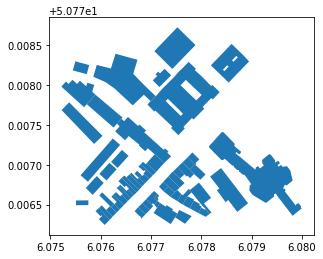

In [13]:
fig = rdf.plot()

## Working with graphs
Spatial graphs can be traceable to a mathematical concept. A mathematical graph is composed of **nodes** which are linked by **edges**. Therefore, nodes can represent geographic places with specific locations and edges represent connecting paths. The composition is needed to analyse structures, such as the following example of path calculation shows.

In [14]:
#Attention, getting the whole of Aachen takes many minutes, we will get the inner city only
G = ox.graph_from_point(point, dist=500, network_type="walk")

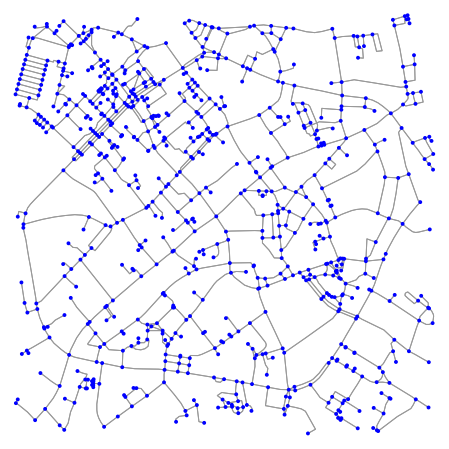

In [15]:
ax, fig = ox.plot_graph(G, node_color='b', node_zorder=3, bgcolor='#FFFFFF')

In the following, we are going to plot the shortest path between a start and an end point. There is one issue, the actual train station is not part of the map itself, so the closest point to the train station is chosen. If you pick two nodes, then the shortest path between those two can be found, using weight = *length*. One-way streets are correctly handled. 

In [16]:
#Set start and end point (value)
start = ox.nearest_nodes(G, reiff[1], reiff[0])
dest  = ox.nearest_nodes(G, hbf[1], hbf[0])

The shortes_path() function comes from the NetworX library. If the weight parameter of this function is specified, the Dijkstra's algorithm is used to find the optimal route. This algorithm belongs to the class of Greedy algorithms. In graph theory, these are used to solve optimization problems such as finding the shortest path. 

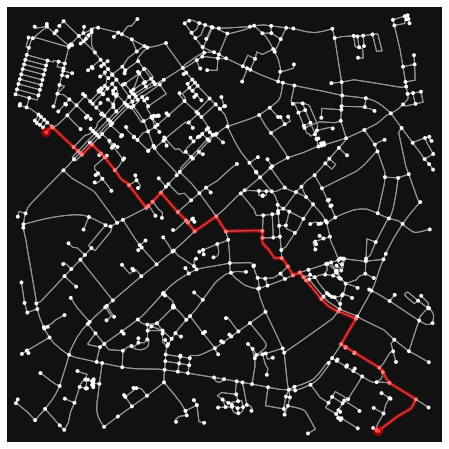

(<Figure size 576x576 with 1 Axes>, <AxesSubplot:>)

In [17]:
#Calculate the shortest path between start and end point
route = ox.shortest_path(G, start, dest)
ox.plot_graph_route(G, route)

## Network analysis
We just did network analysis to get a specific result. But what is network analysis in general. It is not just finding the shortest path between *Reiff Museum* and *Aachen Central station*.  
In general, on top of a network data model, more network analysis functions can be implemented. One of them is finding specific subgraphs, such as for example which nodes can be reached starting at a specific point. This subgraph, finding all reachable nodes starting from a specific point, is called *connected subgraph*. The figure below shows reachable nodes starting from node **n2**. As you can see, the node **n6** is **not reachable**.
![con_subgraph](./img/con_subg.jpg)
Another network analysis operation is finding the *minimum spanning tree*, which is the spanning tree with the minimum sum of edge weights. Take a look at the following figure, each edge has a value here. **a)** is the original graph, **b)** is the minimal spanning tree, because there are not just no cycles left, but adding all costs together is **= 14**, which is the lowest possible value. **c)** is also a spanning tree, but not the minimal one, because all cost values together are 20, which is **> 14**.
![min_tree](./img/mini_tree.jpg)  
One of the most important network operations is called *shortest path*. Here the path with the lowest costs between two nodes is calculated. But what means *the lowest costs*? Well every edge can have a value, this values defines the cost. A value could be the length of an edge, for example. We just used a method for calculating the shortest path between two places, which are (in our graph) represented as points. The method we used is based on the *Dijkstra Algorithm*.  
[Dijkstra algorithm](https://de.wikipedia.org/wiki/Dijkstra-Algorithmus#:~:text=Der%20Algorithmus%20von%20Dijkstra%20(nach,Pfade%20f%C3%BCr%20einen%20gegebenen%20Startknoten.) is better explained watching a video, search for Dijykstra on You Tube, there are a lot of tutorials. When we calculated the shorted path between *Reiff Museum* and *Aachen central station* in the method *.shorted_path()*, we actually use the Dijkstra algorithm.

## Saving graphs to GeoPackage and SVG file
Sometimes you need this picture printed as PNG or JPG or a more geo related file such as GeoPackage.

In [ ]:
ox.save_graph_geopackage(G, filepath="mynetwork.gpkg")

Or we could also save it as Shapefile:

In [ ]:
ox.save_graph_shapefile(G, filepath="mynetwork.shp")

Other times you may need your graphs to be able to load in for example illustrator and therefore saved as **svg** file. When running the code below, a new file will show up in your file structure, called mynetwork.svg.

In [ ]:
ox.plot_graph_route(G, route, node_color='b', node_zorder=3, bgcolor='#FFFFFF', show=False, save=True, filepath='./mynetwork.svg')

### Exercise
Add another path, for example from the Aachen university hospital to the Aachen city hall. You are welcome to choose another path, but the map must be extended and for practise do not reuse *Reiff* and *Hbf*. Print both the existing and the new path in one map, use different colours. Hint: Checkout the OSMnx documentation for functions such as plot_graph_route().  